In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use('./deeplearning.mplstyle')

In [2]:
# Using the same housing data

X_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [7]:
class GradientDescent():

    def __init__(self, X, y, lr=0.1):
        self.lr = lr
        self.X = X
        self.y = y
        self.m = X.shape[0]

    # Model representation
    def f(self, x, w, b):
        return w * x + b

    # Compute output prediction for each input sample, given some choice for w & b

    def compute_model_output(self, w, b):
        f_wb = np.zeros(self.m)

        for i in range(self.m):
            f_wb[i] = self.f(self.X[i], w, b)

        return f_wb


    def compute_cost(self, w, b):
        cost = (self.compute_model_output(w, b) - self.y)
        cost_sum = np.sum(cost**2)
        return (1 / (2 * self.m)) * cost_sum


    def cost_derivative_w(self, w, b):
        cost = (self.compute_model_output(w, b) - self.y)
        dj_dw = np.sum(cost * self.X)
        dj_dw = dj_dw * (1 / self.m)
        return dj_dw


    def cost_derivative_b(self, w, b):
        cost = (self.compute_model_output(w, b) - self.y)
        dj_db = np.sum(cost)
        dj_db = dj_db * (1 / self.m)
        return dj_db


    def update_weights(self, w, b):
        tmp_w = w - self.lr * self.cost_derivative_w(w, b)
        tmp_b = b - self.lr * self.cost_derivative_b(w, b)
        w = tmp_w
        b = tmp_b

        return w, b


    def run(self):
        w = random.randint(0, 500)
        b = random.randint(0, 500)

        cost = self.compute_cost(w, b)
        prev_cost = cost + 1

        while prev_cost > cost:
            prev_cost = cost
            print(f'Current cost = {prev_cost}')
            w, b = self.update_weights(w, b)
            cost = self.compute_cost(w, b)
            
        print(f'\nFinal cost = {prev_cost}')
        return w, b

In [8]:
gd = GradientDescent(X_train, y_train, lr=0.1)
w, b = gd.run()

print(f'Optimal Parameters: w = {w}, b = {b}')

Current cost = 46416.5
Current cost = 20139.193124999998
Current cost = 8785.191276562497
Current cost = 3878.621291601561
Current cost = 1757.5955874032516
Current cost = 840.0444888616723
Current cost = 442.4557566520642
Current cost = 269.52684364338904
Current cost = 193.67599712140853
Current cost = 159.7829876956511
Current cost = 144.03361880916356
Current cost = 136.13904900689275
Current cost = 131.65388854915128
Current cost = 128.65733603468078
Current cost = 126.31930794255581
Current cost = 124.2809540834572
Current cost = 122.3870175610829
Current cost = 120.57020443584028
Current cost = 118.80122714231234
Current cost = 117.0672213718911
Current cost = 115.36242133114655
Current cost = 113.6841310676841
Current cost = 112.03098389157346
Current cost = 110.40219033841962
Current cost = 108.79721321922285
Current cost = 107.21562718797678
Current cost = 105.65705802829034
Current cost = 104.12115638215028
Current cost = 102.60758635954062
Current cost = 101.11602057772133


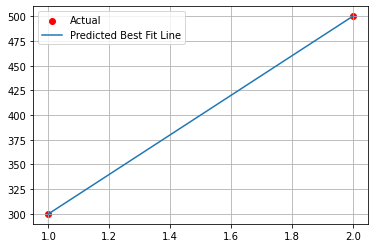

In [9]:
plt.scatter(X_train, y_train, c='r', label='Actual')
plt.plot(X_train, gd.compute_model_output(w, b), label='Predicted Best Fit Line')
plt.grid()
plt.legend()
plt.show()